In [33]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
import numpy as np
import pandas as pd

In [34]:
T = 0.1
s = ctl.TransferFunction.s

In [35]:
C = 1/(1.59154943091895*s + 1.0)
C

TransferFunction(array([1]), array([1.59154943, 1.        ]))

In [36]:
C_z = ctl.c2d(C, T, method='zoh')
C_z

TransferFunction(array([0.06089863]), array([ 1.        , -0.93910137]), 0.1)

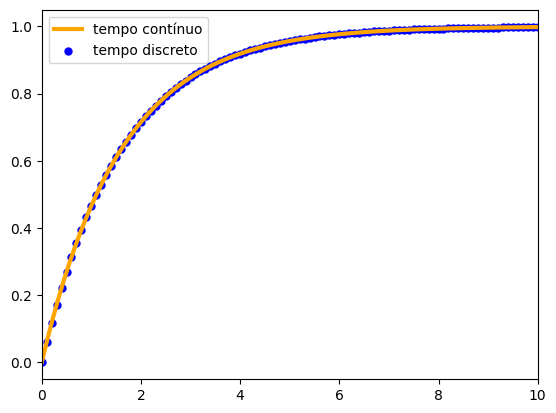

In [37]:
time, response = ctl.step_response(C)
plt.plot(time, response, color='orange', linewidth=3, label='tempo contínuo')

time, response = ctl.step_response(C_z)
plt.scatter(time, response, color='blue', s=25, label='tempo discreto')

plt.xlim([0, 10])
plt.legend()
plt.show()

# COMPARANDO A RESPOSTA DO CONTROLADOR

In [38]:
num, den = ctl.tfdata(C_z)
num = np.squeeze(num)
den = np.squeeze(den)

num = num/den[0]
den = den/den[0]

print(num)
print(den)

0.06089863257570749
[ 1.         -0.93910137]


In [39]:
if type(num) == np.float64:
    num = np.array([num])

In [40]:
out = ''

for i in range(0, len(num)):
    out += f'{num[i]}*X_n{i} + '

for i in range(1, len(den)):
    out += f'+ {-1*den[i]}*Y_n{i}'

out = out.replace('X_n0', 'X_n').replace('+ +', '+').replace('+ -', '-')
print(out + ';')

0.06089863257570749*X_n + 0.9391013674242926*Y_n1;


In [41]:
Y_n1 = Y_n2 = 0
X_n1 = X_n2 = 0

def computeController(X_n):
    global Y_n1, Y_n2
    global X_n1, X_n2
    Y_n = eval(out)

    X_n2 = X_n1
    X_n1 = X_n
    Y_n2 = Y_n1
    Y_n1 = Y_n
    return Y_n

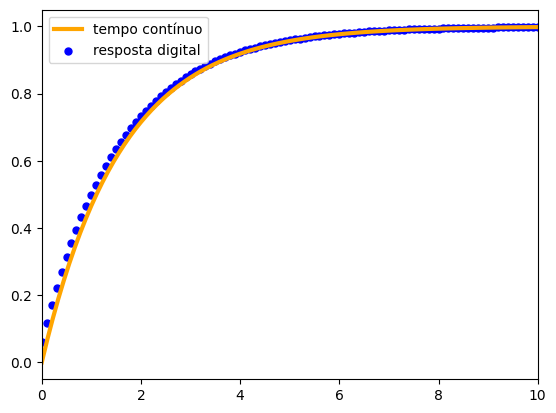

In [42]:
time, response = ctl.step_response(C)
plt.plot(time, response, color='orange', linewidth=3, label='tempo contínuo')

Y_n1 = Y_n2 = 0
X_n1 = X_n2 = 0
time     = np.arange(0, 20, T)
response = [computeController(1) for i in time] 
plt.scatter(time, response, color='blue', s=25, label='resposta digital')

plt.xlim([0, 10])
plt.legend()
plt.show()

# TESTANDO NOS DADOS DISCRETOS

In [43]:
def normalizeData(time, response, T=0.01):
    timeIntervals = np.arange(np.min(time), np.max(time), T)
    xData = []
    yData = []

    for i in range(len(timeIntervals) - 1):
        position      = timeIntervals[i]
        next_position = timeIntervals[i + 1]

        target = response[(time > position) & (time <= next_position)]
        
        if len(target) == 0:
            continue
        
        t = (next_position + position)/2
        y = np.min(target)

        xData.append(t)
        yData.append(y)

    return xData, yData

(3500.0, 4200.0)

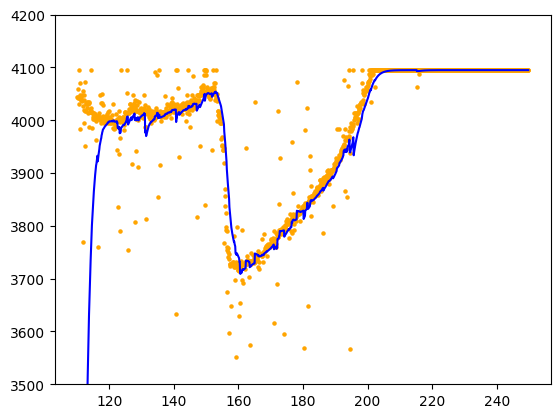

In [44]:
df = pd.read_csv('DataBase.csv')
df = df.loc[(df['time'] > 110) & (df['time'] < 250)]

xData = df['time'].to_numpy()
yData = df['analog'].to_numpy()

xData, yData = normalizeData(xData, yData, T=0.1)
plt.scatter(xData, yData, s=5, color='orange')

Y_n1 = Y_n2 = 0
X_n1 = X_n2 = 0
response = [computeController(val) for val in yData] 
plt.plot(xData, response, color='blue', label='resposta digital')
plt.ylim(3500, 4200)